# 데이터 전처리 실습


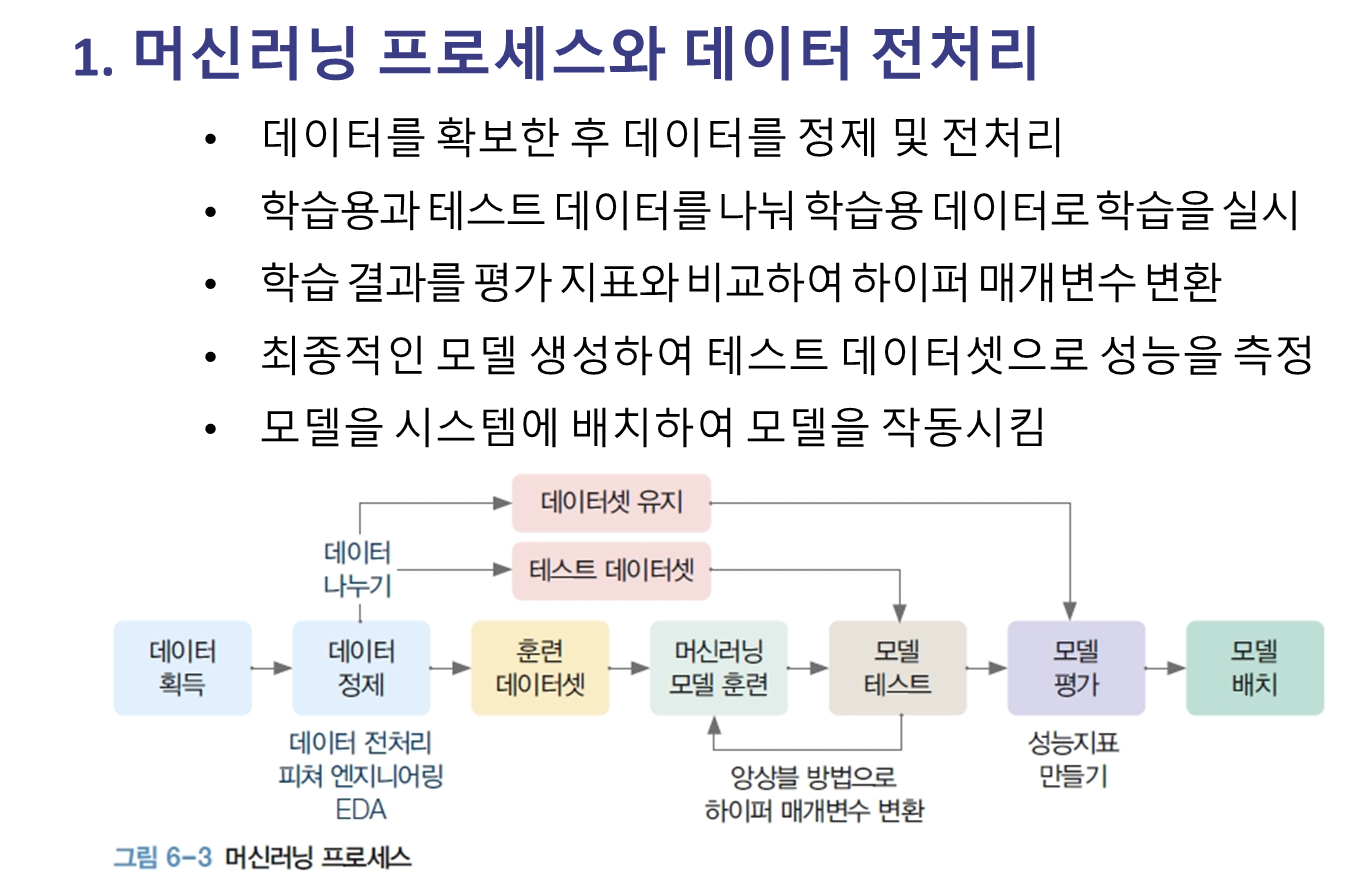

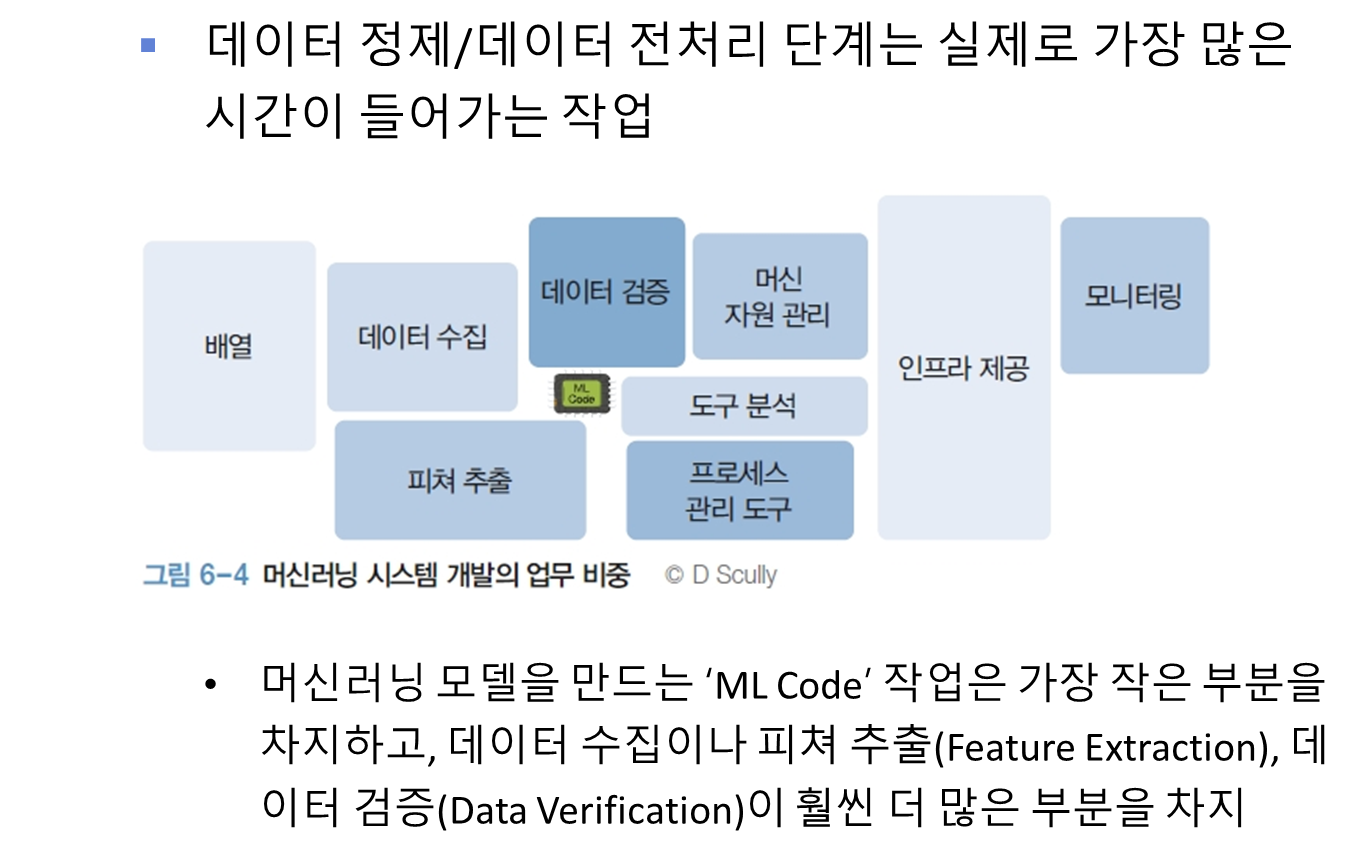

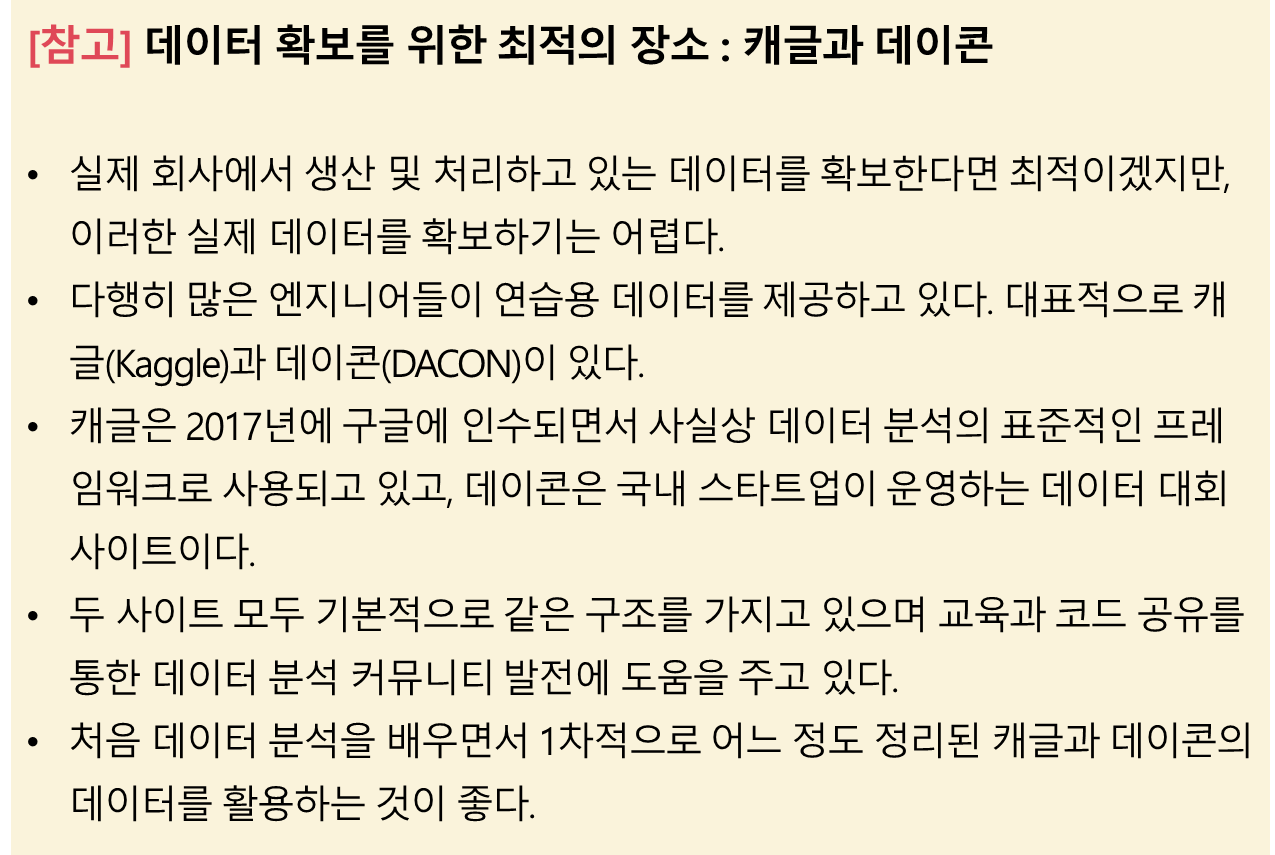

- 캐글 : https://www.kaggle.com
- 데이콘 : https://dacon.io
- 캐글 대학생 그랜드마스터 검색 해보기

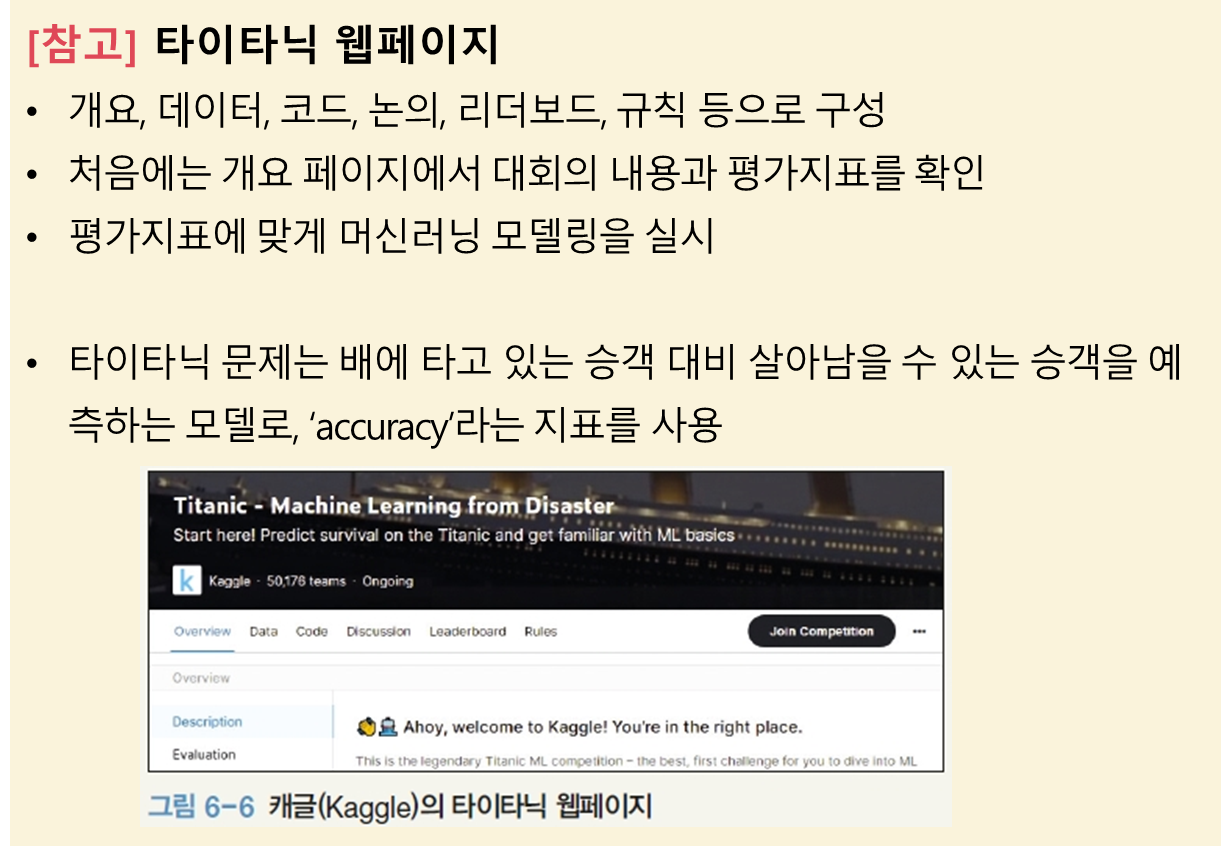

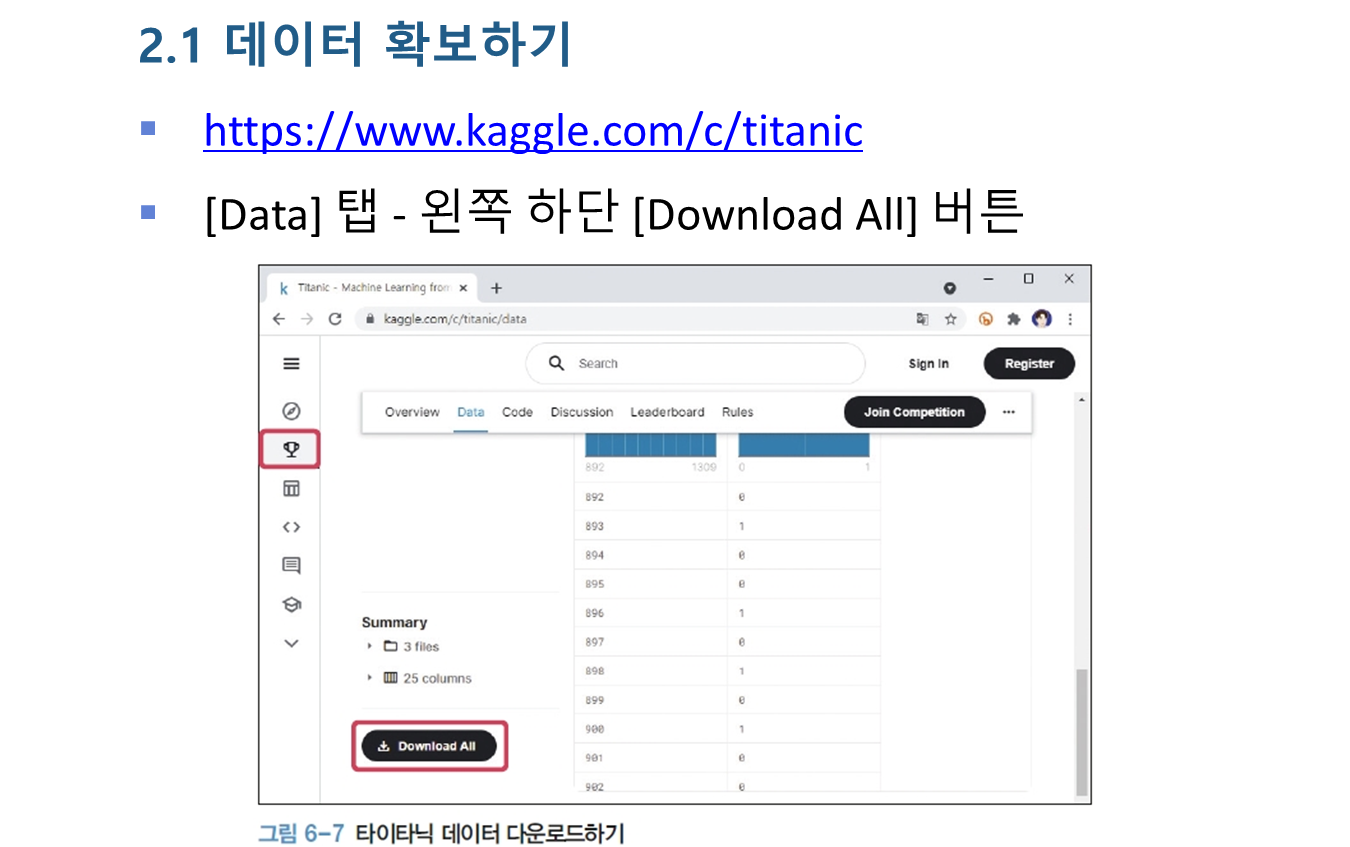

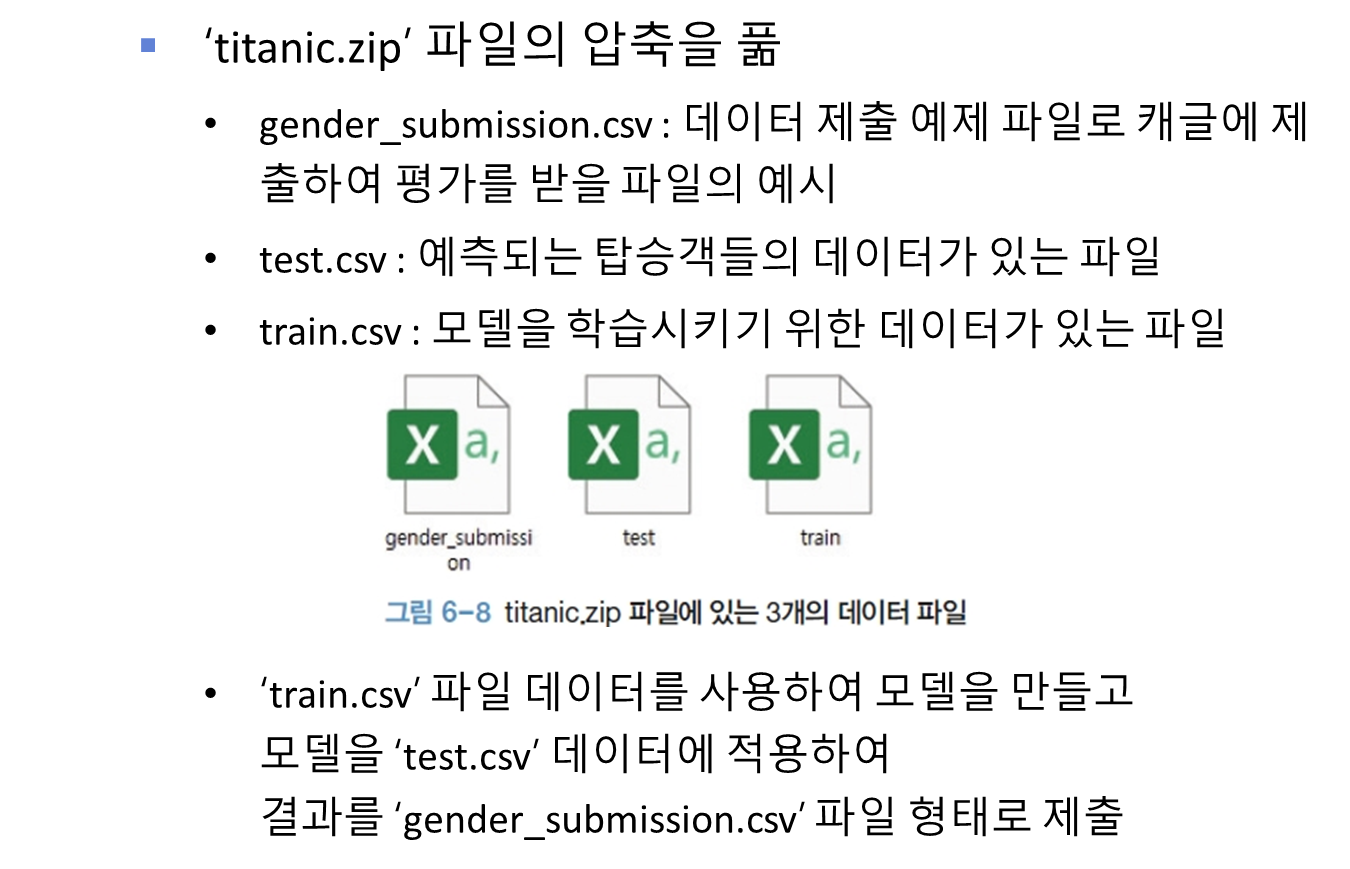

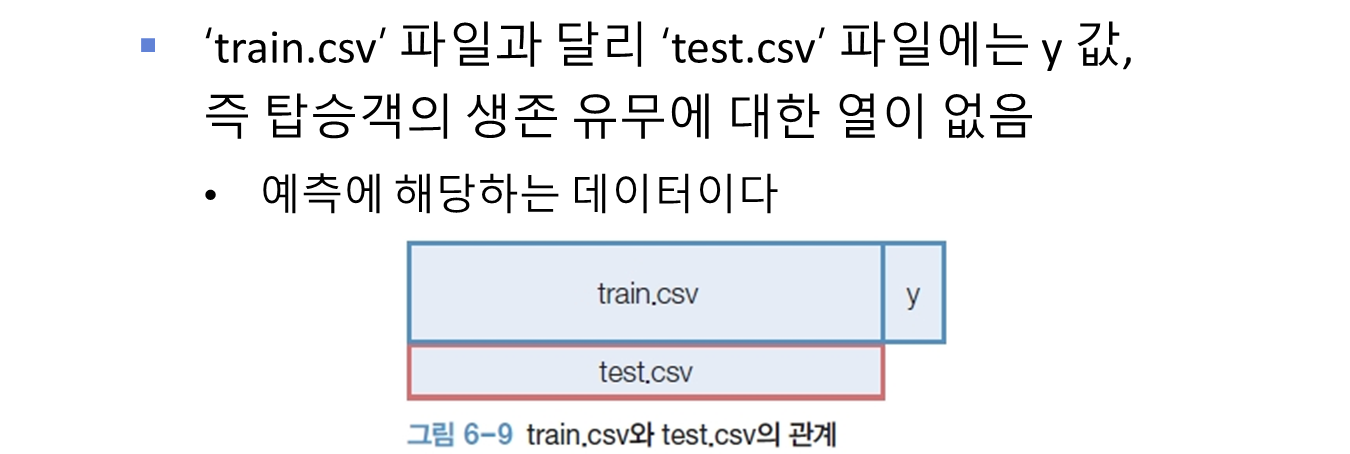

### Titanic Top 4% with ensemble modeling
- https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling
### EDA To Prediction (DieTanic)
- https://www.kaggle.com/ash316/eda-to-prediction-dietanic
#### 들어가기
- 타이타닉은 아시다시피, 사상 최대 해난사고로써, 1,500여명의 희생자
- 타이타닉에 탑승한 사람들의 신상정보를 활용
- 승선한 사람들의 생존여부를 예측하는 모델을 생성
### 프로세스
- 데이터셋 확인

    - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재

- 탐색적 데이터 분석(exploratory data analysis)

   - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인
   - 여러 시각화 툴을 사용하여 insight 찾기
- feature engineering

    - NaN 값에 평균값을 넣어준다거나 삭제같은 preprocessing이 필요
    - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering
    - one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등
- model 만들기

    - sklearn 을 사용해 모델 생성
    - 딥러닝을 위해 tensorflow, pytorch 등을 사용
    - 모델 학습 및 예측
- trainset 을 가지고 모델을 학습

    - testset 을 가지고 prediction
- 모델 평가

    - 예측 성능이 원하는 수준인지 판단

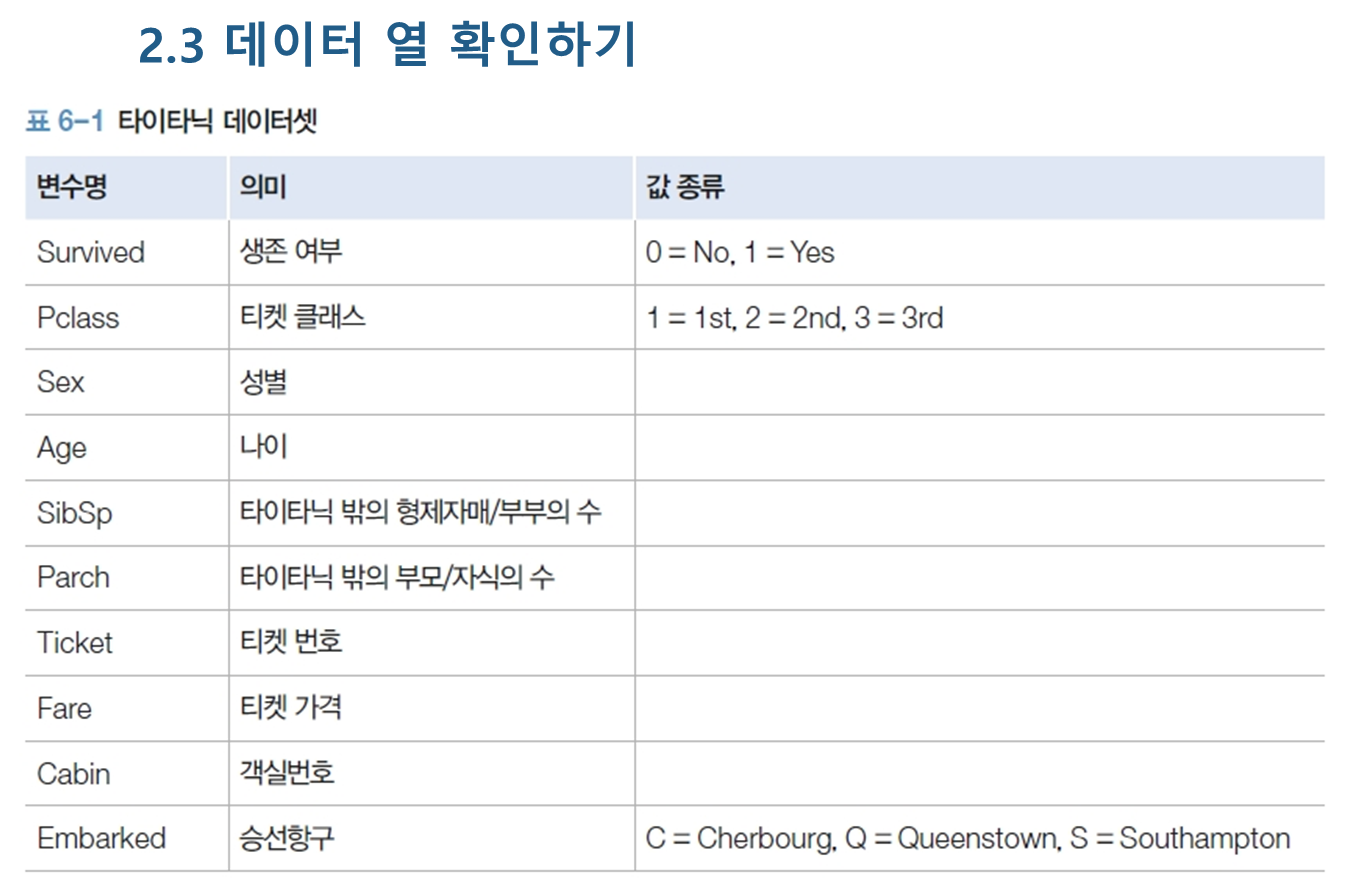

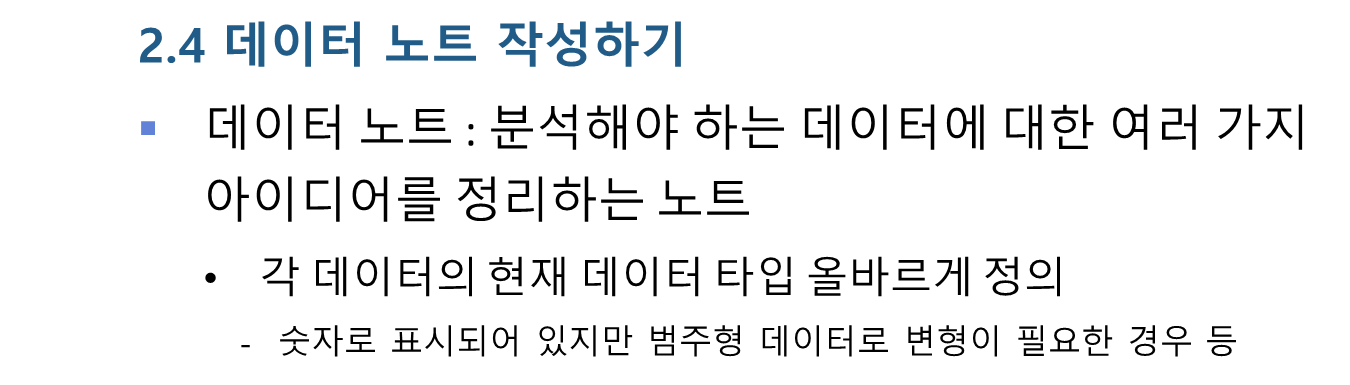

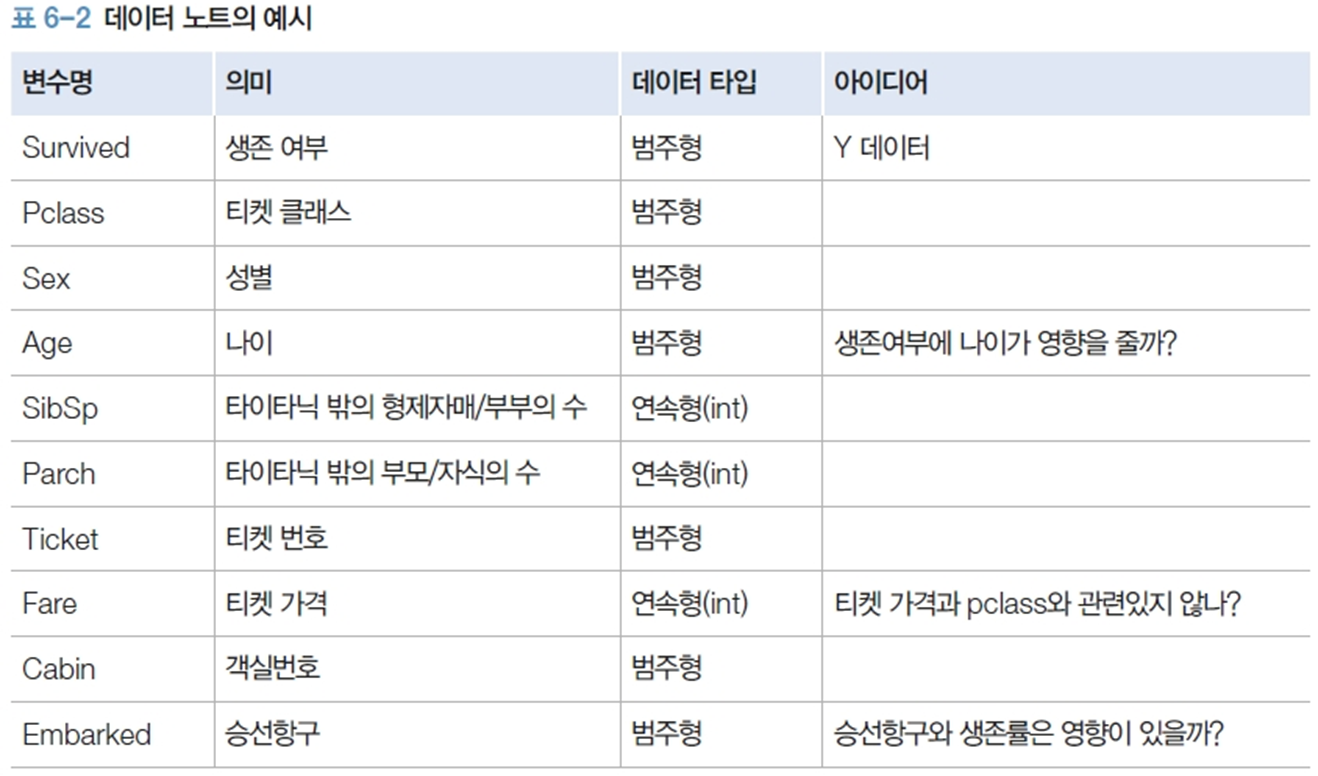

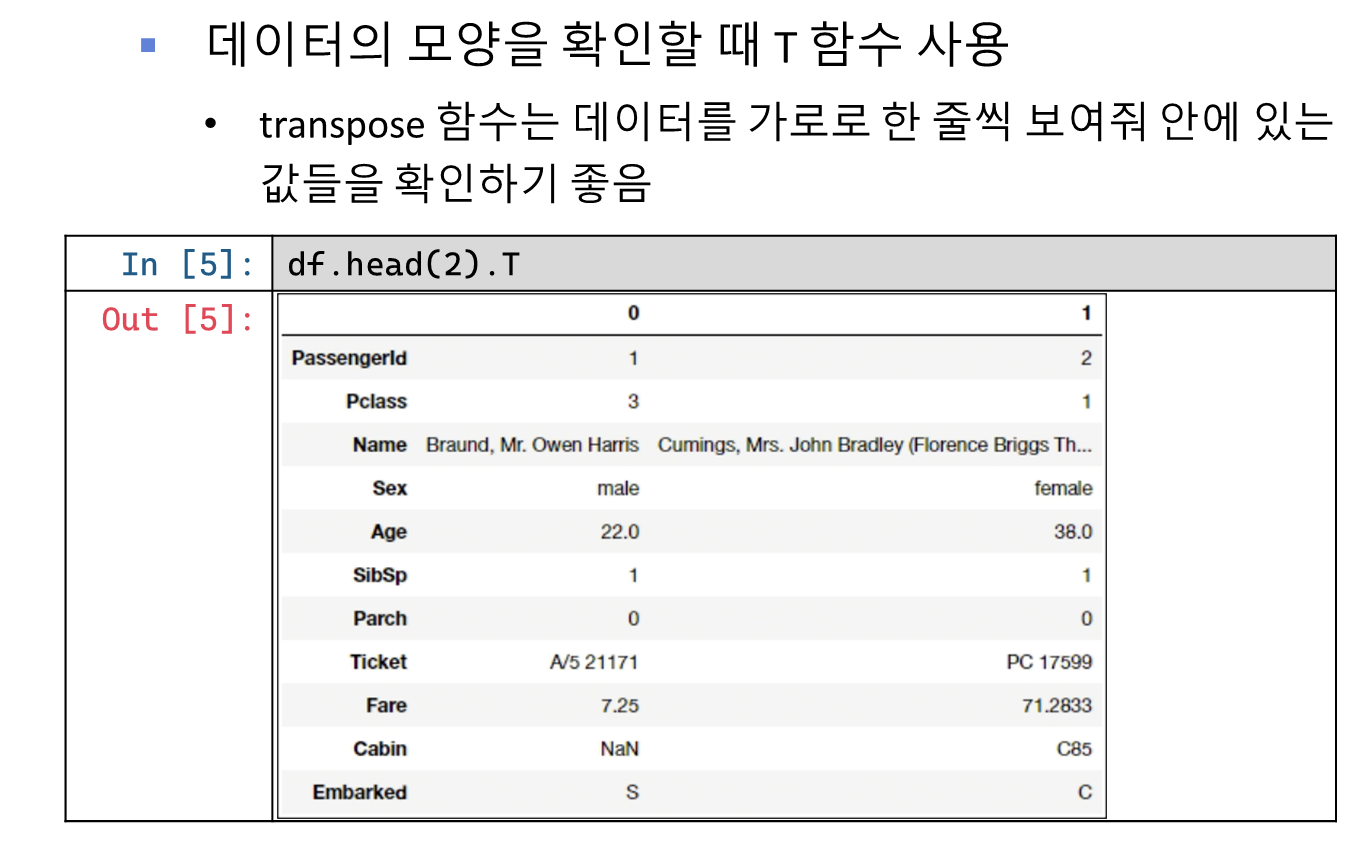

In [1]:
!pip install missingno

### 캐글에서 타이타닉 데이터 다운 완료

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


탐색적 자료 분석 EDA


In [3]:
data_files = ['./data/titanic/train.csv','./data/titanic/test.csv']
train = pd.read_csv(data_files[0])
test = pd.read_csv(data_files[1])


In [4]:
print('\n ### train 데이터 정보 ###  \n')
print(train.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Survived 가 없음
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.shape, test.shape


((891, 12), (418, 11))

### 결측치 처리 Null data check

In [10]:
# 177개의 나이, 687개의 Cabin, 2개의 Embarked에 대한 정보 존재하지 않음
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#비율 확인.
train.isnull().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [16]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

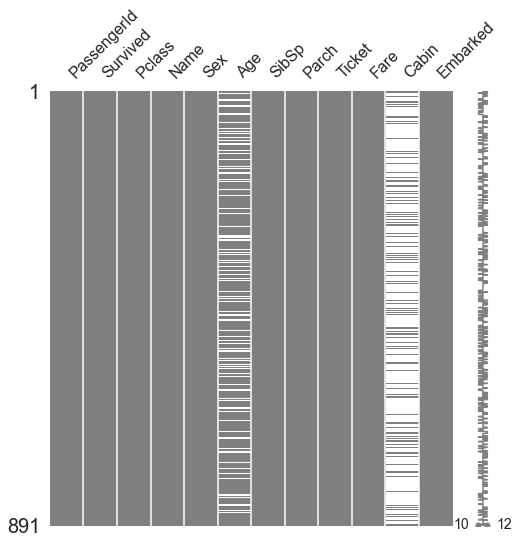

In [17]:
# MANO 라는 라이브러리를 사용
# null data의 존재 그래프로 보기
msno.matrix(df=train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.5, 0.5))

<AxesSubplot:>

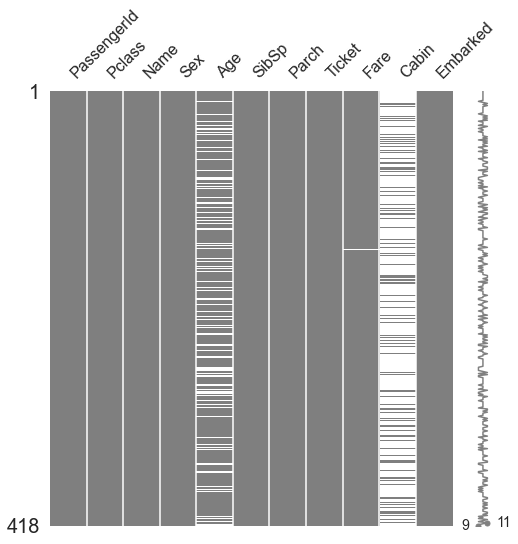

In [18]:
msno.matrix(df=test.iloc[:, :], figsize=(8, 8), color=(0.5, 0.5, 0.5))

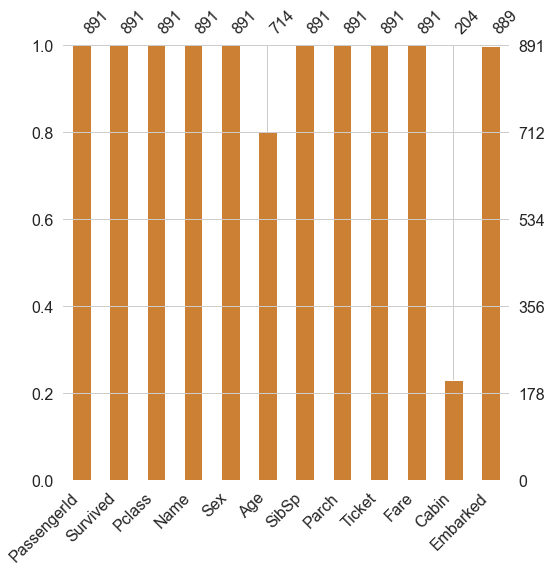

In [19]:
msno.bar(df=train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
plt.show()

<AxesSubplot:>

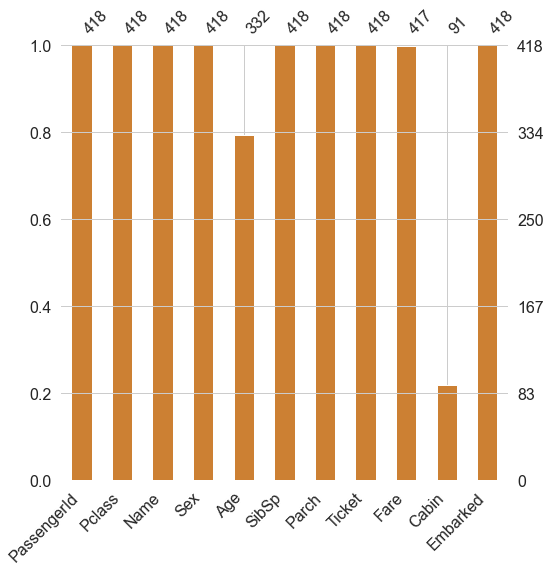

In [20]:
msno.bar(df=test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))


### Target label 확인 - Servived
- 전체 확인
    - target label 이 어떤 distribution 을 가지고 있는 지 확인
    - binary classification 문제의 경우에서, 1과 0의 분포 확인

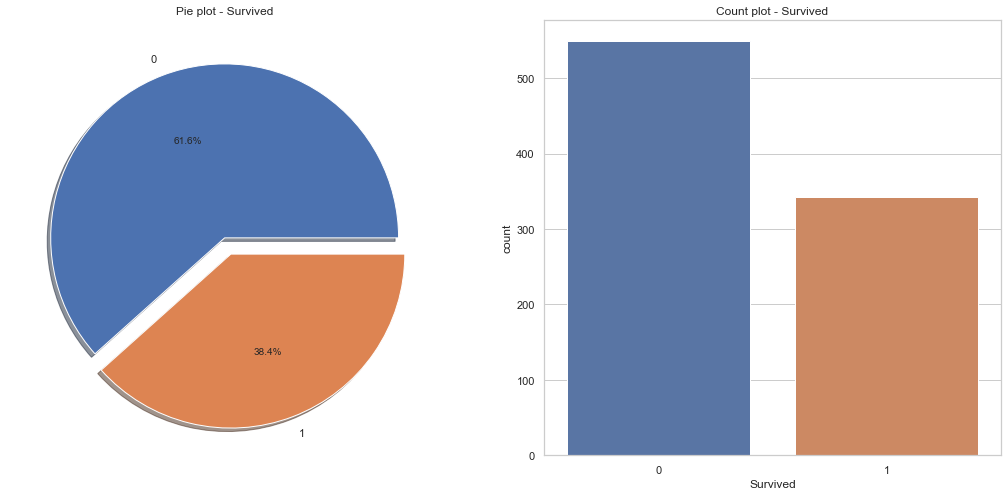

In [22]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

train['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 사망 61.6% / 생존 38.4%
- target label 의 분포가 제법 균일(balanced)
- 불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우 모델이 모든것을 1이라 해-도 정확도가 99%
- 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됨

### 범주형 features에 대한 확인 - Survived
- pclass 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- sex 승객 성별
- sibsp 동반한 형제자매, 배우자 수
- parch 동반한 부모, 자식 수
- cabin 객실 번호
- embarked 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
